# Network Analysis with NetworkX
One key progression when working with network data is to shift your understanding beyond simply thinking of them as visualisations that we can qualitatively interpret, but also as models for structuring data in a relational way that allows us to ask different kinds of questions.

Furthermore, network analysis can be in and of itself a method of analysis, but it can also form a part of a larger analysis. For example by using network analysis to identify community partitions you can create a categorical variable to then subdivide your data during exploratory analysis.

Rather than turn to Gephi, we can use NetworkX for this relational modelling and analysis.

#### [NetworkX](https://networkx.org) is a Python library for creating, analysing, and visualising networks
* written in pure Python
* flexible and easy to install
* relatively scalable

In [5]:
# Import networkx and other packages we will use

import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Create a network
We'll create a small toy network directly using NetworkX to show how it is possible to structure data into a relational model straight from Python.

In [6]:
# Create an empty network
G = nx.Graph()
# G = nx.DiGraph() # Creates a directed network

# Add nodes
G.add_node(1)

# Or add a set of nodes from a list
G.add_nodes_from([2, 3, 4, 5, 6])
G.nodes()

NodeView((1, 2, 3, 4, 5, 6))

In [7]:
# Add edges
G.add_edge(1, 2)
G.add_edge(2, 4)

# Or add a set of edges from a list

node_list = [(1, 4), (3, 4), (1, 5), (2, 6), (5,6)]

G.add_edges_from(node_list)

In [8]:
# Check the created edges
G.edges()

EdgeView([(1, 2), (1, 4), (1, 5), (2, 4), (2, 6), (3, 4), (5, 6)])

In [9]:
# Check basic properties of the graph

print(f'Number of nodes: {G.number_of_nodes()}')
print(f'Number of edges: {G.number_of_edges()}')

Number of nodes: 6
Number of edges: 7


NetworkX has some visualisation features, based on Matplotlib. Note that it will struggle to provide coherent visuals of very large networks, such as Twitter networks (more on this later).

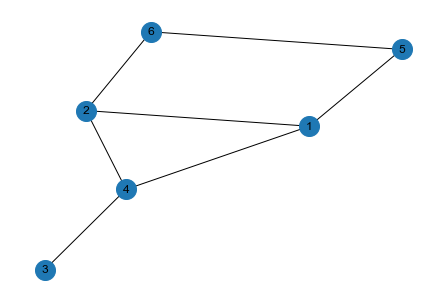

In [10]:

# Draw a network

nx.draw(G, with_labels=True,node_size=400)

# Note that without a provided layout, the network visual will change each run.

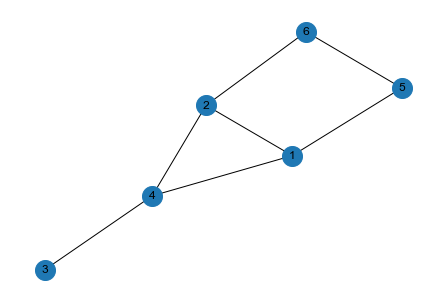

In [11]:
layout = nx.fruchterman_reingold_layout(G, seed=1) # seed ensures we all get the same graph rather than it being random.

nx.draw(G, pos=layout, with_labels=True,node_size=400)


In [12]:
# Basic network properties
G.degree

DegreeView({1: 3, 2: 3, 3: 1, 4: 3, 5: 2, 6: 2})

In [13]:
# Captuturing it in a dataframe

pd.DataFrame(G.degree, columns=['id','degree'])

,id,degree
0,1,3
1,2,3
2,3,1
3,4,3
4,5,2
5,6,2


### Add node attributes

In [14]:
# Add attributes to existing nodes

G.nodes[1]['team'] = "A"
G.nodes[2]['team'] = "A"
G.nodes[3]['team'] = "B"
G.nodes[4]['team'] = "B"
G.nodes[5]['team'] = "A"
G.nodes[6]['team'] = "A"

In [15]:
# Assign different colour to nodes with different attributes
node_color = ['#a5b41f' if G.nodes[v]["team"] == "A"
    else '#1fb4a5' for v in G]

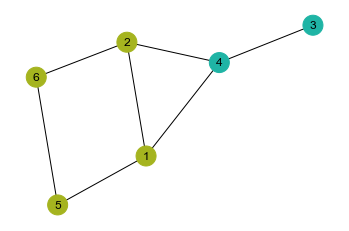

In [16]:
# Plot the network with node colours representing team categories

nx.draw_networkx(G, with_labels=True, node_color=node_color,node_size=400)

plt.axis('off')
plt.show()

In [17]:
# You can examine the attributes with a keyword to G.nodes
G.nodes(data=True)

NodeDataView({1: {'team': 'A'}, 2: {'team': 'A'}, 3: {'team': 'B'}, 4: {'team': 'B'}, 5: {'team': 'A'}, 6: {'team': 'A'}})

### Directed network
Whether you use a directed or undirected network is a decision based on what the network represents. Is there some directionality to the relations between nodes, or does that not matter?
- Friendships
- Communication
- Word co-occurence
- Cash/wealth flows between people.

In [18]:
# Create an empty directed network
DG = nx.DiGraph()

# Add nodes
DG.add_nodes_from([1, 2, 3, 4, 5, 6])

# Add edges
DG.add_edges_from([(1, 2),(2, 4),(1, 4), (3, 4), (1, 5), (2, 6), (5,6)])

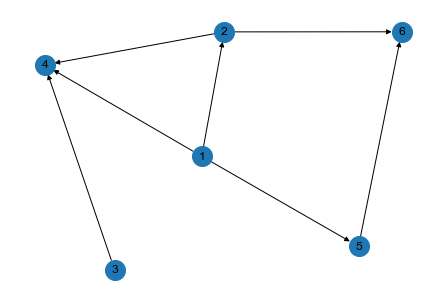

In [19]:
# Draw the directed network

nx.draw(DG, with_labels=True,node_size=400)

In [20]:
# You can also determine if a graph is directed like so...

print( G.is_directed() )
print( DG.is_directed() )

False
True


# Exercise 1
Below we will load in a new example graph called the Karate club graph. Can you answer the following questions?
1. How many nodes and edges in the graph?
2. Which node has the most connections? (Use Pandas to help you)
3. Is the karate club graph directed or undirected?
4. Draw the karate club network with labels.

The karate club graph was produced by Anthropologist Wayne Zachary as part of his ethnographic work observing the interactions between members outside of the club setting such as classes, bars, other sports clubs etc.

Each node represents a club member, each edge represents association outside of the club.


*Zachary, W.W. (1977) ‘An Information Flow Model for Conflict and Fission in Small Groups’, Journal of Anthropological Research, 33(4), pp. 452–473.*

In [24]:
karate = nx.karate_club_graph()

In [25]:
# Write you code for exercise 1 below




The graph has 34 nodes and 78 edges.
The graph is directed, true or false?: False


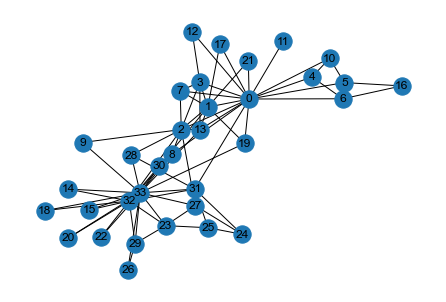

In [26]:
print(f'The graph has {karate.number_of_nodes()} nodes and {karate.number_of_edges()} edges.')
print(f'The graph is directed, true or false?: {karate.is_directed()}')

karate = nx.karate_club_graph()
nx.draw(karate, with_labels=True)

# Graph Metrics
In this section we use the full [Star Wars Social Network](https://www.kaggle.com/datasets/ruchi798/star-wars). Each node represents a character and each edge represents the number of times a pair of characters appeared together in a scene of the movie. Edges are undirected and weighted, and we also have the total number of scenes a character appeared in.

In [20]:
## CODE USED TO CONVERT THE ORIGINAL DATASET TO OUR CSV FILES

# import json
# with open('star_wars/starwars-full-interactions-allCharacters.json','r') as f:
#     file = json.load(f)
#
# node_list = pd.DataFrame(file['nodes'])[['name','value']].rename(columns={'value':'n_scenes'})
#
#
# edge_list = pd.DataFrame(file['links']).rename(columns={'value':'weight'})
# edge_list['source'] = edge_list['source'].map(node_list['name'].to_dict())
# edge_list['target'] = edge_list['target'].map(node_list['name'].to_dict())
#
# node_list.to_csv('star_wars_node_list.csv', index=False)
# edge_list.to_csv('star_wars_edge_list.csv', index=False)

In [32]:
node_list = pd.read_csv('star_wars_node_list.csv')
edge_list = pd.read_csv('star_wars_edge_list.csv')

In [33]:
node_list.head()

,name,n_scenes
0,R2-D2,171
1,CHEWBACCA,145
2,BB-8,40
3,QUI-GON,62
4,NUTE GUNRAY,25


In [34]:
edge_list.head()

,source,target,weight
0,CHEWBACCA,R2-D2,17
1,BB-8,R2-D2,2
2,BB-8,CHEWBACCA,8
3,OBI-WAN,R2-D2,28
4,PADME,R2-D2,24


In [35]:
# Create a graph object using the from_pandas_edgelist function

sw_G = nx.from_pandas_edgelist(edge_list, source="source", target="target", edge_attr='weight')

In [36]:
sw_G.number_of_nodes()

111

In [37]:
sw_G.number_of_edges()

450

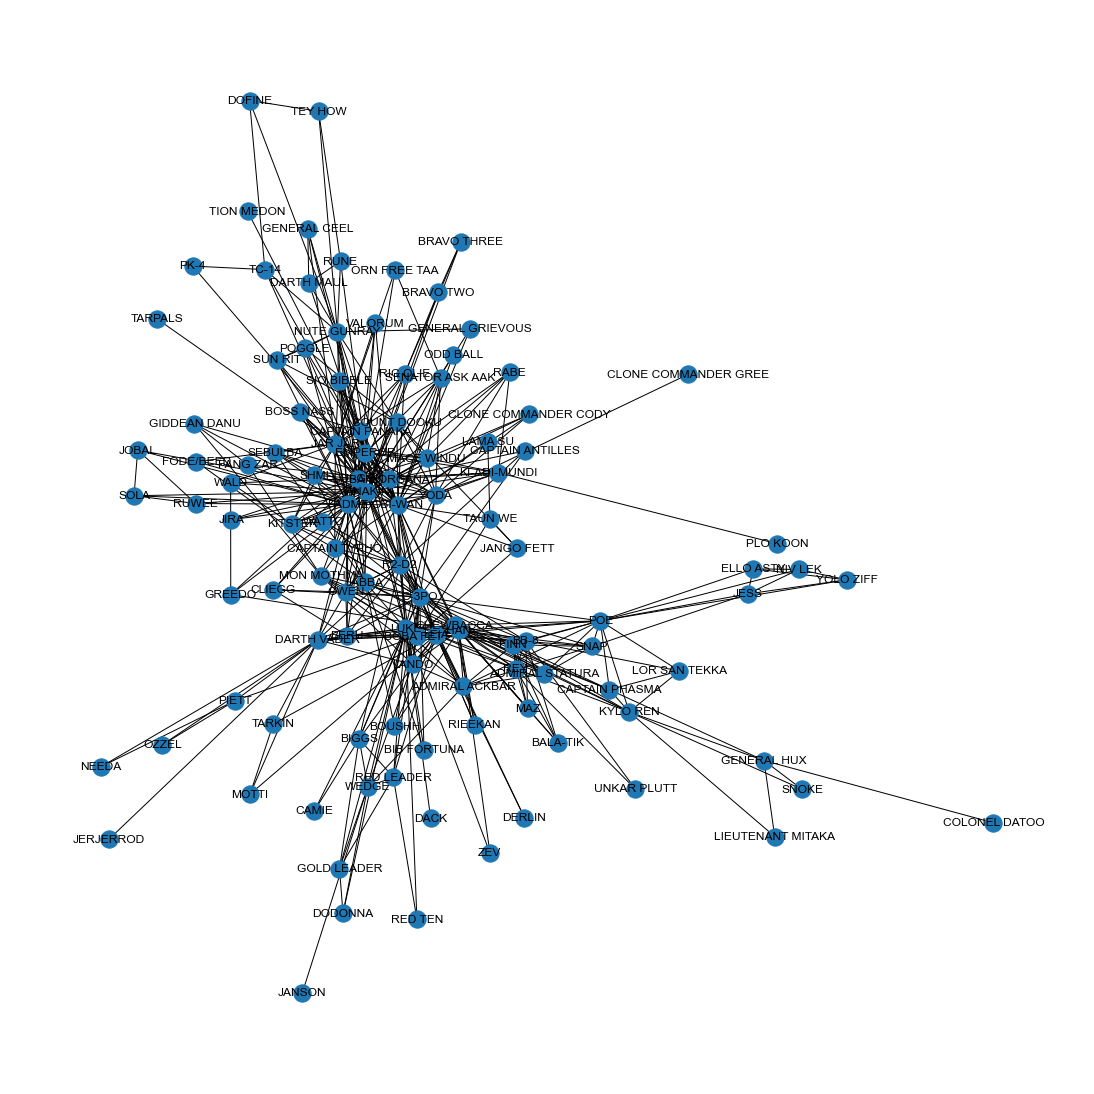

In [38]:
plt.figure(figsize=(15,15))

layout = nx.spring_layout(sw_G)
nx.draw(sw_G, layout, with_labels=True)

plt.show()

# Better Visualisation

### [netwulf: simple and interactive network visualization in Python](https://netwulf.readthedocs.io/en/latest/index.html)
<img src='https://raw.githubusercontent.com/benmaier/netwulf/master/img/logo_small.png' align="right" height="200">

Visualising networks using NetworkX can get complicated. But you can always pass a networkx Graph-objects to other tools to easily create beautifully looking network visualizations. Netwulf is such an interactive visualization tool for networkx Graph-objects.

In [39]:
# Install and import netwulf
! pip install netwulf
from netwulf import visualize

In [40]:
visualize(sw_G)

(None, None)

# Network Metrics
Like in Gephi, metrics can be used to leverage the network model of relational data to learn more about our dataset. Exactly what a metric means depends on what the model represents.


In [41]:
# Some helpful functions

# Sets the size attribute of our graph to whatever scores are passed in
def size_by(G,scores):
    nx.set_node_attributes(G,scores, name='size')
    return G

# sorts scores and shows the top n
def top_n(scores, n=10):
    top = sorted(scores.items(), key=lambda x:x[1], reverse=True)[0:n]
    return top

# Of all the scores, degree does not conform to the same structure as everything else, so we MAKE IT!
def standardise_degree(degree_scores):
    return {name:score for name,score in degree_scores}

The number of edges connected to each node. In our data this indicates the number of unique characters that each character interacted with.

In [42]:
# Node degree - number of edges adjacent to that node
sw_G_degree = standardise_degree(sw_G.degree)
top_n(sw_G_degree)

[('ANAKIN', 42),
 ('OBI-WAN', 37),
 ('C-3PO', 36),
 ('PADME', 34),
 ('QUI-GON', 27),
 ('LUKE', 27),
 ('HAN', 26),
 ('LEIA', 25),
 ('JAR JAR', 24),
 ('R2-D2', 23)]

In [31]:
visualize(size_by(sw_G, sw_G_degree))

NameError: name 'sw_G' is not defined

### Betweenness Centrality
Indicates the extent to which a node stands between two others. In our data this could indicate the characters most central to the progression of the story. Generally in films side characters only have relevance to the degree to which they interact with a core of characters. Higher betweeness indicates these characters tie in the side chracters to the larger network.

Unweighted indicates the extent to which they draw in side characters regardless of how many interactions they have with that character. Weighted will factor in the number of interactions.

In [71]:
# Compute betweenness centrality — unweighted

betweenness = nx.betweenness_centrality(sw_G, normalized=False)
top_n(betweenness)

[('OBI-WAN', 1253.2109879529773),
 ('C-3PO', 1026.2745918679796),
 ('ANAKIN', 966.7994788578143),
 ('LUKE', 864.9757067594625),
 ('HAN', 588.4983296591214),
 ('DARTH VADER', 520.0201440097031),
 ('EMPEROR', 455.45646749086677),
 ('POE', 446.3752972730651),
 ('PADME', 415.9074143243325),
 ('CHEWBACCA', 373.9812171183446)]

In [38]:
# Compute betweenness centrality — weighted

betweenness = nx.betweenness_centrality(sw_G, weight='weight', normalized=False)
top_n(betweenness)

[('ANAKIN', 1202.1068378327977),
 ('C-3PO', 1185.2797400435647),
 ('OBI-WAN', 904.6883223423448),
 ('LUKE', 759.4728477558784),
 ('LEIA', 618.488805355666),
 ('JAR JAR', 524.652247632639),
 ('JABBA', 493.3019259268865),
 ('DARTH VADER', 488.3550849498177),
 ('HAN', 470.94493033205026),
 ('CAPTAIN PHASMA', 464.62445265432876)]

In [49]:
visualize(size_by(sw_G,betweenness))


(None, None)

### Eigenvector Centrality
Indicates the importance of a node based on the importance of the nodes it is connected to. For us this could indicate our core characters. A character that interacts with all the main cast would have a higher eigenvector score.

In [39]:
# Compute eigenvector centrality

eigenvector = nx.eigenvector_centrality(sw_G)
top_n(eigenvector)

[('ANAKIN', 0.29656614921513713),
 ('OBI-WAN', 0.2810463592564618),
 ('C-3PO', 0.2753430975993982),
 ('PADME', 0.2580025161393472),
 ('QUI-GON', 0.2289683940348899),
 ('R2-D2', 0.22771376143671912),
 ('EMPEROR', 0.21093374567650905),
 ('LUKE', 0.19107492367791754),
 ('JAR JAR', 0.1864057918924881),
 ('YODA', 0.18114520894399294)]

In [55]:
visualize(size_by(sw_G,eigenvector))


(None, None)

### Closeness Centrality
How close is a node to the rest of the network? On average how many steps would it take to get from a node to any other node in the network. A high closeness centrality indicates that a node is closer to all other nodes. It is often used to indicate access to other nodes, or information flow in a network. How easy would it be for you to be introduced to any other person in the university?

In our graph this indicates how easy it would be for us to link a character to any other character based on the character's interactions. Again it is a centrality measure so it indicates importance. In well connected graphs closeness centrality has less variance.

In [44]:
# Compute closeness centrality

closeness = nx.closeness_centrality(sw_G)
top_n(closeness)

[('C-3PO', 0.5670103092783505),
 ('OBI-WAN', 0.5641025641025641),
 ('ANAKIN', 0.5555555555555556),
 ('LUKE', 0.5314009661835749),
 ('R2-D2', 0.5213270142180095),
 ('HAN', 0.5164319248826291),
 ('EMPEROR', 0.5069124423963134),
 ('LEIA', 0.497737556561086),
 ('PADME', 0.4954954954954955),
 ('CHEWBACCA', 0.49327354260089684)]

In [45]:
visualize(size_by(sw_G,closeness))


(None, None)

#### Shortest Path
Related to closeness centrality, average shortest path can be used to get a sense of how close a network is overall and we can also examine the shortest path between characters.

In [48]:
# Compute the average shortest path for the network

nx.average_shortest_path_length(sw_G)

2.664045864045864

In [49]:
# Get the distance from Luke to any other character

nx.shortest_path_length(sw_G, 'LUKE')

{'LUKE': 0,
 'REY': 1,
 'CHEWBACCA': 1,
 'YODA': 1,
 'MON MOTHMA': 1,
 'ADMIRAL ACKBAR': 1,
 'WEDGE': 1,
 'ZEV': 1,
 'DACK': 1,
 'EMPEROR': 1,
 'RED LEADER': 1,
 'ANAKIN': 1,
 'JABBA': 1,
 'DODONNA': 1,
 'LANDO': 1,
 'BIB FORTUNA': 1,
 'BIGGS': 1,
 'BERU': 1,
 'DARTH VADER': 1,
 'HAN': 1,
 'R2-D2': 1,
 'CAMIE': 1,
 'GOLD LEADER': 1,
 'OWEN': 1,
 'OBI-WAN': 1,
 'C-3PO': 1,
 'RED TEN': 1,
 'LEIA': 1,
 'VALORUM': 2,
 'BAIL ORGANA': 2,
 'CAPTAIN TYPHO': 2,
 'PADME': 2,
 'CAPTAIN PANAKA': 2,
 'BOSS NASS': 2,
 'UNKAR PLUTT': 2,
 'MOTTI': 2,
 'PK-4': 2,
 'BOBA FETT': 2,
 'KI-ADI-MUNDI': 2,
 'RIEEKAN': 2,
 'CLONE COMMANDER CODY': 2,
 'JANSON': 2,
 'SOLA': 2,
 'TION MEDON': 2,
 'KYLO REN': 2,
 'CAPTAIN ANTILLES': 2,
 'GIDDEAN DANU': 2,
 'POGGLE': 2,
 'JIRA': 2,
 'RUNE': 2,
 'ODD BALL': 2,
 'JAR JAR': 2,
 'SHMI': 2,
 'NUTE GUNRAY': 2,
 'GENERAL CEEL': 2,
 'BRAVO THREE': 2,
 'CLIEGG': 2,
 'KITSTER': 2,
 'GENERAL GRIEVOUS': 2,
 'LAMA SU': 2,
 'WALD': 2,
 'GREEDO': 2,
 'RUWEE': 2,
 'BB-8': 2,
 'SNA

In [69]:
# Get the shortest path between any two characters

nx.shortest_path(sw_G, 'LUKE','DARTH MAUL')

['LUKE', 'EMPEROR', 'DARTH MAUL']

## Community Detection
Like in Gephi, we can detect distinct communities in the graph. This can be useful when you want to identify clusters in the graph as part of another workflow without having to export everything to Gephi. We'll use this technique later during our text mining sessions.

In [64]:
communities = nx.algorithms.community.louvain_communities(sw_G, weight='weight')
communities

[{'BIGGS',
  'CAMIE',
  'DODONNA',
  'GOLD LEADER',
  'JANSON',
  'RED LEADER',
  'RED TEN',
  'WEDGE'},
 {'BERU', 'CLIEGG', 'OWEN'},
 {'ADMIRAL ACKBAR',
  'BIB FORTUNA',
  'BOUSHH',
  'C-3PO',
  'CHEWBACCA',
  'DACK',
  'DERLIN',
  'HAN',
  'JABBA',
  'LANDO',
  'LEIA',
  'LUKE',
  'R2-D2',
  'RIEEKAN',
  'ZEV'},
 {'ADMIRAL STATURA',
  'BALA-TIK',
  'BB-8',
  'CAPTAIN PHASMA',
  'COLONEL DATOO',
  'ELLO ASTY',
  'FINN',
  'GENERAL HUX',
  'JESS',
  'KYLO REN',
  'LIEUTENANT MITAKA',
  'LOR SAN TEKKA',
  'MAZ',
  'NIV LEK',
  'POE',
  'REY',
  'SNAP',
  'SNOKE',
  'UNKAR PLUTT',
  'YOLO ZIFF'},
 {'ANAKIN',
  'BAIL ORGANA',
  'BOSS NASS',
  'BRAVO THREE',
  'BRAVO TWO',
  'CAPTAIN ANTILLES',
  'CAPTAIN PANAKA',
  'CAPTAIN TYPHO',
  'CLONE COMMANDER CODY',
  'CLONE COMMANDER GREE',
  'COUNT DOOKU',
  'DARTH MAUL',
  'DOFINE',
  'EMPEROR',
  'FANG ZAR',
  'FODE/BEED',
  'GENERAL CEEL',
  'GENERAL GRIEVOUS',
  'GIDDEAN DANU',
  'GREEDO',
  'JAR JAR',
  'JIRA',
  'JOBAL',
  'KI-ADI-MUNDI',


In [65]:
len(communities)

6

In [66]:
nx.algorithms.community.modularity(sw_G, communities,weight='weight')

0.40857165228257275

If we wanted to use this to colour our graph we could do this...

In [67]:


assignment = {}
for community_id, community_set in enumerate(communities):
    for node in community_set:
        assignment[node] = community_id

assignment

{'BIGGS': 0,
 'JANSON': 0,
 'RED TEN': 0,
 'CAMIE': 0,
 'WEDGE': 0,
 'DODONNA': 0,
 'RED LEADER': 0,
 'GOLD LEADER': 0,
 'OWEN': 1,
 'CLIEGG': 1,
 'BERU': 1,
 'CHEWBACCA': 2,
 'LANDO': 2,
 'BIB FORTUNA': 2,
 'HAN': 2,
 'DERLIN': 2,
 'BOUSHH': 2,
 'C-3PO': 2,
 'DACK': 2,
 'JABBA': 2,
 'ADMIRAL ACKBAR': 2,
 'ZEV': 2,
 'RIEEKAN': 2,
 'LUKE': 2,
 'R2-D2': 2,
 'LEIA': 2,
 'BB-8': 3,
 'BALA-TIK': 3,
 'REY': 3,
 'COLONEL DATOO': 3,
 'KYLO REN': 3,
 'ELLO ASTY': 3,
 'GENERAL HUX': 3,
 'LOR SAN TEKKA': 3,
 'NIV LEK': 3,
 'MAZ': 3,
 'SNAP': 3,
 'UNKAR PLUTT': 3,
 'SNOKE': 3,
 'JESS': 3,
 'ADMIRAL STATURA': 3,
 'LIEUTENANT MITAKA': 3,
 'YOLO ZIFF': 3,
 'POE': 3,
 'CAPTAIN PHASMA': 3,
 'FINN': 3,
 'BOSS NASS': 4,
 'GIDDEAN DANU': 4,
 'RABE': 4,
 'GENERAL CEEL': 4,
 'BRAVO TWO': 4,
 'PLO KOON': 4,
 'SEBULBA': 4,
 'JAR JAR': 4,
 'TAUN WE': 4,
 'ORN FREE TAA': 4,
 'FANG ZAR': 4,
 'CLONE COMMANDER GREE': 4,
 'DOFINE': 4,
 'FODE/BEED': 4,
 'RUNE': 4,
 'OBI-WAN': 4,
 'LAMA SU': 4,
 'EMPEROR': 4,
 'CAPTA

In [69]:
nx.set_node_attributes(sw_G, assignment, name='group')

In [72]:
size_by(sw_G,betweenness)

visualize(sw_G)

(None, None)

In [100]:
# Let's standardise how we generate community labels and measure modularity

def find_communities(G, weight='weight'):
    comms = nx.algorithms.community.louvain_communities(G,weight=weight)
    n_communities = len(comms)
    modularity = nx.algorithms.community.modularity(G,comms,weight='weight')
    assignments = {}
    for com_id, members in enumerate(comms):
        for node in members:
            assignments[node] = com_id
    return assignments, n_communities, modularity

# Exercise 2
- Calculate the betweeness centrality of the karate club members. Which members are the top scoring?
- Size the graph by betweeness centrality.
- Detect the communities in the karate club. What is the modularity of the communities detected? Use `find_communities`
- Using `set_node_attributes` assign the community assignments to the nodes in the karate graph. Make sure you name the attribute `group`
- Visualise the graph using Netwulf

In [105]:
karate = nx.karate_club_graph()

In [ ]:
bc = nx.betweenness_centrality(karate, weight='weight')

In [113]:
top_n(bc)

[(0, 0.4737689393939393),
 (33, 0.3967803030303029),
 (19, 0.24065656565656565),
 (31, 0.12563131313131315),
 (32, 0.07222222222222223),
 (2, 0.0694128787878788),
 (24, 0.06407828282828282),
 (1, 0.06401515151515152),
 (17, 0.030492424242424244),
 (5, 0.029356060606060608)]

In [ ]:
size_by(karate,bc)
comms, n_communities, modularity = find_communities(karate, weight=None)

In [111]:
nx.set_node_attributes(karate, comms, name='group')

In [112]:
visualize(karate)

(None, None)

## Following up on the Karate Club
Zachary found that during his ethnographic work, the club got into an internal dispute over whether to raise the membership prices. Two key figures, Mr. Hi and the club officer were in disagreement. Eventually the club split into two with a new club opening up.

After clustering the interaction data into two distinct groups Zachary found that his model of member interaction accurately predicted which of the two factions each member would join, making 33 out of 34 correct guesses.

In [181]:
assignments = {}
for com_id, members in enumerate(nx.algorithms.community.greedy_modularity_communities(karate)):
    for node in members:
        assignments[node] = com_id
clusters = pd.Series(assignments, name='cluster')
clusters.head()

8     0
14    0
15    0
18    0
20    0
Name: cluster, dtype: int64

In [182]:
faction = pd.Series([karate.nodes[v]['club'] for v in karate], name='faction')
faction.head()


0    Mr. Hi
1    Mr. Hi
2    Mr. Hi
3    Mr. Hi
4    Mr. Hi
Name: faction, dtype: object

In [183]:
pd.crosstab(index=faction,columns=clusters)

cluster,0,1,2
faction,,,
Mr. Hi,1,8,8
Officer,16,1,0


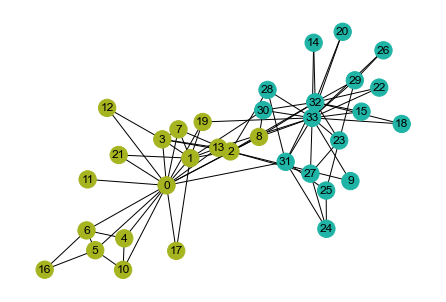

In [118]:
# Extra background on the karate club

node_color = ['#a5b41f' if karate.nodes[v]["club"] == "Mr. Hi"
              else '#1fb4a5' for v in karate]
layout = nx.spring_layout(karate, weight='weight')
nx.draw(karate,pos=layout, with_labels=True, node_color=node_color)

## Graph Filtering
When we used Gephi, we filtered away some edges and nodes based on degree, and then cleared away any nodes that weren't part of the giant component. We can also do this in NetworkX as a form of pre-processing before we try community detection on particularly noisy graphs, like Twitter data.

In [108]:
visualize(nx.k_core(sw_G,k=4))

(None, None)

(None, None)

In [48]:
# Some filtering functions

def filter_by_k_core(G, k):
     return nx.k_core(G, k=k)

def filter_by_degree(G, minimum_degree):
    scores = G.degree()
    to_keep = [node for node,degree in scores if degree >= minimum_degree]
    return G.subgraph(to_keep)

def filter_by_giant_component(G):
    components = sorted(nx.connected_components(G), key=len, reverse=True)
    return G.subgraph(components[0])

In [49]:
filtered = filter_by_degree(sw_G, 2)
visualize(filtered)

(None, None)

Let's test this on a real case network, our tweet data.

In [59]:
tweet_G = nx.from_pandas_edgelist(pd.read_csv('retweet_edge_list.csv'), create_using=nx.Graph)

comms, n_communities, modularity = find_communities(tweet_G)
print(f'Our network has {n_communities} communities, with a modularity score of {modularity}')

Our network has 364 communities, with a modularity score of 0.677996729165068


In [80]:
filtered = filter_by_degree(tweet_G, 2)
filtered = filter_by_giant_component(filtered)

comms, n_communities, modularity = find_communities(filtered, weight='weight')
print(f'Our network has {n_communities} communities, with a modularity score of {modularity}')

Our network has 19 communities, with a modularity score of 0.4438576751774082


In [81]:

nx.set_node_attributes(filtered,comms,name='group')

In [62]:
visualize(filtered)

(None, None)

# Exporting Assignments

In [96]:
comms_data = pd.Series(comms, name='community')
comms_data

davelawson35      0
johnelalamo       0
Trish22Martin     0
greenteen75       0
karl_trotsky      0
                 ..
tonymc39         18
Jay_Beecher      18
PascoeMarice     18
korblimee47      18
DianaHarding7    18
Name: community, Length: 3761, dtype: int64

In [97]:
comms_data.to_csv('communities.csv')

### Acknowledgements
* Notebook adapted from original teaching materials by Dr. Valentin Danchev.
* Menczer, F., Fortunato, S., Davis, C. 2020. A first course in network science. Cambridge University Press.
* Rob Chew’s and Peter Baumgartner’s tutorial “Connected: A Social Network Analysis Tutorial with NetworkX”. PyData 2016.
* Edward L. Platt. 2020. Network Science with Python and NetworkX Quick Start Guide: Explore and visualize network data effectively. Packt Publishing.